## Neural Networks image recognition - MultiLayer Perceptron
Use both MLNN for the following problem.

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

# `np.random.normal`

## Parameters

### loc

Mean (“centre”) of the distribution.

### scale

Standard deviation (spread or “width”) of the distribution. Must be non-negative.

### size

Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

# Neural Networks - Image Recognition 

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
import numpy as np

2023-07-23 10:59:02.018661: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import matplotlib.pyplot as  plt
%matplotlib inline

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [24]:
# the data, shuffled and split between train and test sets

# this chunk *must* be re-run each time before the for-loop is run.
(x_train, y_train), (x_test, y_test) = mnist.load_data()



In [25]:
# Noise is added here
# The max value of the noise should not grossly surpass 1.0

# Just a test of the noise add code.

x_train_noise = x_train + np.random.normal(scale = 1.0, size = (60000, 28, 28))

np.shape(x_train_noise)

(60000, 28, 28)

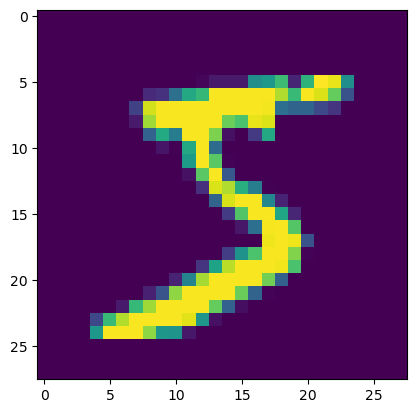

In [26]:
plt.imshow(x_train[0])

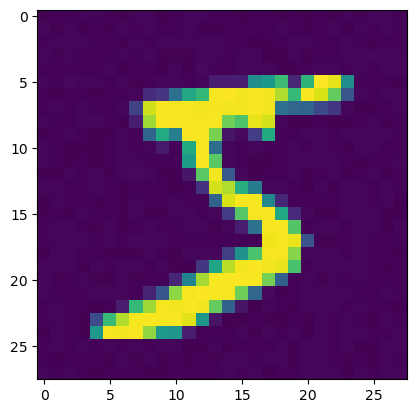

In [27]:
plt.imshow(x_train_noise[0]) # It's subtle, most noticeable in the "zeroes"

In [30]:
x_train_noise = x_train + np.random.normal(scale = 2.0, size = (60000, 28, 28))

np.shape(x_train_noise)

(60000, 28, 28)

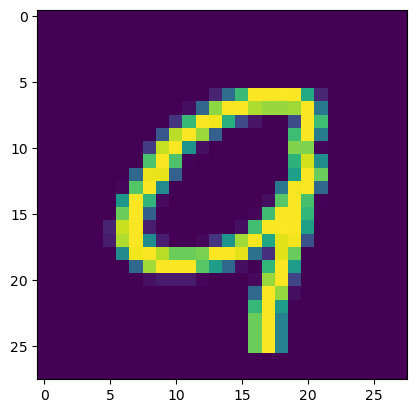

In [31]:
plt.imshow(x_train[3000])

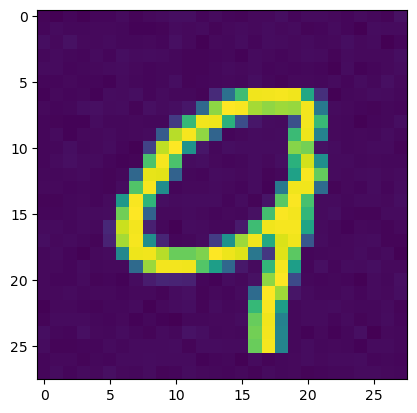

In [32]:
plt.imshow(x_train_noise[3000]) # More noticeable now

In [33]:
x_train_noise = x_train + np.random.normal(scale = 4.0, size = (60000, 28, 28))

np.shape(x_train_noise)

(60000, 28, 28)

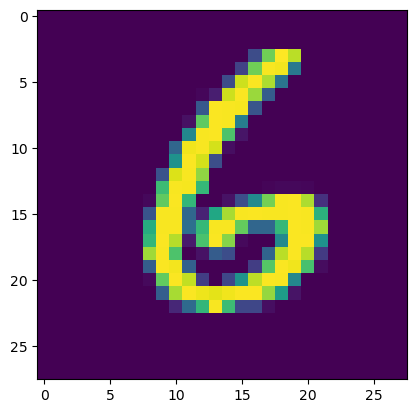

In [34]:
plt.imshow(x_train[6000])

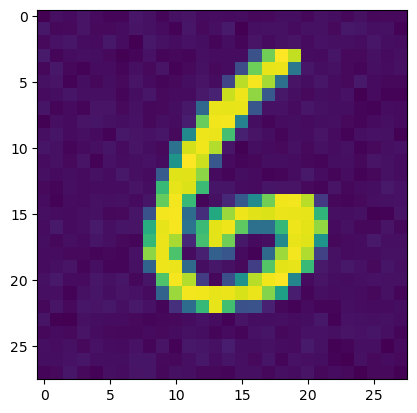

In [35]:
plt.imshow(x_train_noise[6000]) # Very obvious now

In [36]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [37]:
# Wanted to confirm the noise worked as intended once the data was reshaped. plt.imshow doesn't work on 6000x784.

x_train_noise = x_train + np.random.normal(scale = 0.1, size = (60000, 784))

np.shape(x_train_noise)

(60000, 784)

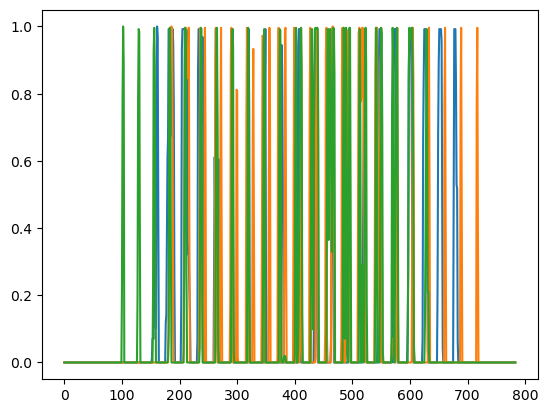

In [38]:
# Basline image plot
plt.plot(x_train[0])
plt.plot(x_train[3000])
plt.plot(x_train[6000])

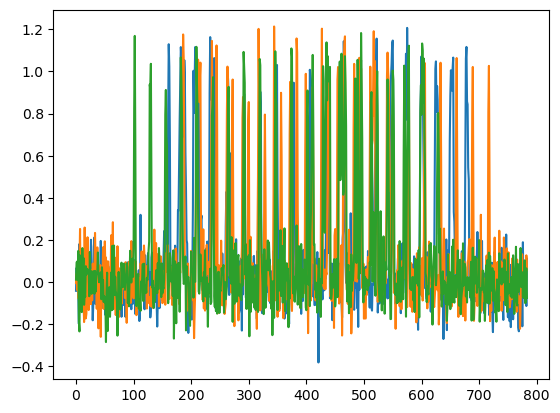

In [39]:
# Images with test noise plot
plt.plot(x_train_noise[0])
plt.plot(x_train_noise[3000])
plt.plot(x_train_noise[6000])

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 512)               401920    
                                                                 
 dropout_46 (Dropout)        (None, 512)               0         
                                                                 
 dense_70 (Dense)            (None, 512)               262656    
                                                                 
 dropout_47 (Dropout)        (None, 512)               0         
                                                                 
 dense_71 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
[0.06582216173410

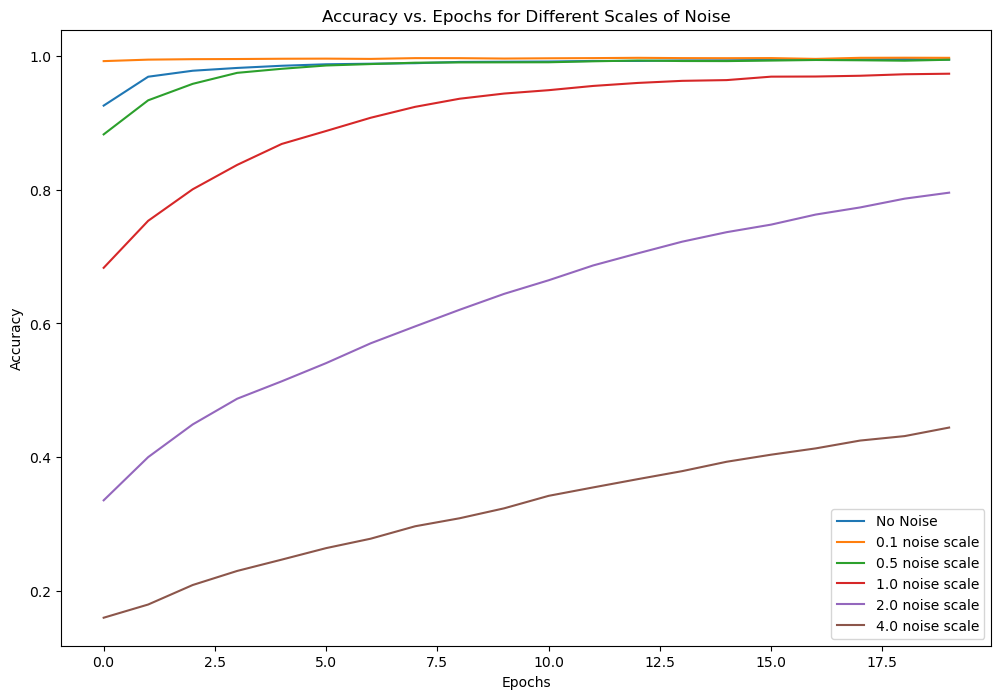

Noise Scale, Loss, Accuracy: No Noise [0.06582216173410416, 0.9854000210762024] [0.1, [0.10657230019569397, 0.9833999872207642], 0.5, [0.4191012680530548, 0.9369000196456909], 1.0, [1.2954272031784058, 0.7897999882698059], 2.0, [2.2101452350616455, 0.45899999141693115], 4.0, [2.4138827323913574, 0.21539999544620514]]


In [63]:
# For Loop of Scales

np.random.seed(7) # Set for reproducibility

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

scales = [0.1,0.5,1.0,2.0,4.0]
batch_size = 128
num_classes = 10
epochs = 20
scores = []
plt.figure(figsize=(12, 8))
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0, # processes faster when not set to verbose
                    validation_data=(x_test, y_test))
        
plt.plot(history.history['accuracy'], label='No Noise')
        
model.summary()
        
score_baseline = model.evaluate(x_test, y_test, verbose=0)
        
print(score_baseline)
        
for scale in scales:
        
    x_train_noise = x_train + np.random.normal(scale = scale, size = (60000, 784))
    
    x_test_noise = x_test + np.random.normal(scale = scale, size = (10000, 784))

    model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
   
    history = model.fit(x_train_noise, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test_noise, y_test))
    
    plt.plot(history.history['accuracy'], label=f'{scale} noise scale')
    
    model.summary()
    
    score = model.evaluate(x_test_noise, y_test, verbose=0)
    
    print(score)   
    
    scores.append(score)
    
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs for Different Scales of Noise')
plt.legend()
plt.show()
printout = [item for sublist in zip(scales, scores) for item in sublist]
print("Noise Scale, Loss, Accuracy:", "No Noise", score_baseline, printout)

From the above plot and print out we can see that the No Noise model has a loss score of 0.066 and an accuracy of 0.985. The 0.1 noise model has a loss of 0.107 and an accuracy of 0.983. The 0.5 noise model has a loss of 0.419 and an accuracy of 0.937. The 1.0 noise model has a loss of 1.295 and an accuracy of 0.790. The 2.0 noise model has a loss of 2.210 and an accuracy of 0.459. Finally the 4.0 noise model has a loss of 2.414 and an accuracy of 0.214.

Generally speaking we can see that the model performance degrades rapidly as the scale of the noise increases. What is fascinating is that when looking at the 4.0 noise scale visually the number is readily obvious to the human eye. 